In [ ]:
from ipywidgets import interact
from fastai.basics import *
import torch
from fastai.tabular.all import *

# Now we don't need to use plt.show()
%matplotlib inline

# Makes the figure output a bit smaller
plt.rc('figure', dpi=90)

# A helper function to plot generic functions
def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None, xlab=None, ylab=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim is not None: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
    if xlab is not None: plt.xlabel(xlab)
    if ylab is not None: plt.ylabel(ylab)
    plt.show()

In [ ]:
insurance = pd.read_csv("https://raw.githubusercontent.com/Greg-Hallenbeck/class-datasets/main/datasets/insurance.csv")

insurance.head(3) #Right now region has too many options to convert to 0,1. What we can do instead is change the different regions into
#seperate columns, we do this by getting dummy variables

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [ ]:
insurance = pd.get_dummies(insurance) #making dummy variables to eventually get everything into binary 0,1
insurance = insurance/insurance.max()

In [ ]:
y = insurance.pop("charges")
x = insurance

In [ ]:
x = torch.tensor(x.values.astype(np.float32))  #Making these into lists of values
y = torch.tensor(y)

In [ ]:
x.size() #Theres 1338 entries in the dataset with 11 columns


torch.Size([1338, 11])

In [ ]:
w = torch.rand(11) # one w for each column in the dataframe

b = torch.rand(1) # one b

In [ ]:

# def tensor_linear(w,b,x):
#   return b + (w*x).sum(dim=1)

# def tensor_layer(w,b,x):
#   return b + x @ w # @ = matrix multiplication

# def relu(x):
#   return torch.where(x>0,x,0) #If X > 0 return x, otherwise return 0

# def predict(w,b,wout,bout,x):
#   #R = number of hidden nodes
#   #1 is the number of outputs
#   #M = the number of columns of X
#   #d = the number of datapoints (rows of X)

#   #w is M x R (M by R)
#   #b is 1 x R (R by 1)

#   #x is d x M
#   #yhat is d x 1


#   #calcuklate activations
#   a = tensor_layer(w,b,x)
#   #Pass through relu
#   z = relu(a)

#   #What are the dimensions of a and z
#   #a is d rows by R columns

#   # z is d rows by R columns since changing X to 0 doesnt get rid of X

#   # Anything storing the data must have "d" rows (d being the number of data points or rows of X)

#   # The X's going down are the columns , and in this function we have "M" of them, making for "R" activations

#   # X1      a/z1
#   # X2      a/z2
#   # .
#   # .
#   # .
#   # XM      a/zR

#   # What should the dimensions of yhat be?
#   # yhat is dn x 1

#   # a1 = b1 + x1w1 + x2w2 +x3w3... (intecept plus column multipled by slope for that column)

#   # yhat = bout + wout * z1 + wout * z2 + ...

#   #wout is R x 1 entries

#   #bout is 1 x 1 (a scalar)

#   #In general, w is (previous layer size) x (next layer size)
#   #and b is (next layer size)

#   #For example... 3 x layers, with 13 activations would be 3x13 ws, then from activations to zs there might be 40 zs so thered be 13 x 40 ws

#   yhat = tensor_linear(wout,bout,z)

# def loss(y, yhat):
#   return (y-yhat).pow(2).sum()

In [ ]:
#def tensor_linear(w, b, x):
# Make a function of the form yhat = b + w_1 x_1 + w_2 x_2 + ...

def tensor_linear(w,b, x):
    return b + (w*x).sum(dim=1)

def tensor_layer(w,b, x):
    return b + x @ w # @ = matrix multiplication

def relu(x):
    return torch.where(x > 0, x, 0)

def predict(w, b, wout, bout, x):
    # R = number of hidden nodes
    # 1 = the number of outputs
    # M = the number of columns of X
    # d = the number of data points (rows of X)

    # w is M x R
    # b is R

    # x is d x M
    # yhat is d x 1

    # Calculate activations
    a = tensor_layer(w, b, x)
    # Pass through the relu
    z = relu(a)

    # What are the dimensions of a and z?
    # a is d x R
    # z is d x R

    # What should the dimensions of yhat be?
    # yhat is d x 1

    # What should the dimensions of wout and bout be?
    # wout is R x 1
    # bout is 1

    # In general, w is (previous layer size) x (next layer size)
    # and b is (next layer size)

    # yhat = bout + wout1 * z1 + wout2 * z2 + ...
    yhat = tensor_linear(wout, bout, z)

    return yhat



def loss(y, yhat):
    return (y-yhat).pow(2).mean()

In [ ]:
# Let's test the predict function
# To make sure everything is working

R = 40
M = x.size()[1] # 11
d = x.size()[0] # 1338

w = torch.rand(M, R).requires_grad_()
b = torch.rand(R).requires_grad_()

wout = torch.rand(R).requires_grad_()
bout = torch.rand(1).requires_grad_()

predict(w, b, wout, bout, x).size()

torch.Size([1338])

In [ ]:
#Make a function of the form yhat = b + w_1 x_1 + w_2 x_2

#yhat = b +  w[0]*x[0] + w[1]*x[1] ... <---- Could do this but takes a long time

dataset = list(zip(x,y))
dl = DataLoader(dataset, batch_size=100, shuffle=True)

# Initialize parameters



# Keep track of the losses

num_epochs = 100
lr = 3e-2
losses = []

# for e in range(num_epochs):
#     losses.append(0)

#     # New loop over each observation
#     for step, (x,y) in enumerate(dl):

#         # Calculate the predicted value
#         yhat = tensor_linear(w, b, x)

#         # Calculate approximate Loss
#         J = loss(y, yhat)
#         losses[-1] += float(J/len(dl))

#         J.backward()
#         with torch.no_grad():
#             w.sub_(lr*w.grad)
#             b.sub_(lr*b.grad)

#         w.grad.data.zero_()
#         b.grad.data.zero_()

#dataset = list(zip(x,y))
#dl = DataLoader(dataset, batch_size=100, shuffle=True)

# Initialize parameters
#w = torch.rand(11).requires_grad_()
#b = torch.rand(1).requires_grad_()


# Keep track of the losses

for e in range(num_epochs):

    # Calculate the predicted value
    yhat = predict(w, b, wout, bout, x)

    # Calculate approximate Loss
    J = loss(y, yhat)
    losses.append(float(J))

    J.backward()
    with torch.no_grad():
        w.sub_(lr*w.grad)
        b.sub_(lr*b.grad)
        wout.sub_(lr*wout.grad)
        bout.sub_(lr*bout.grad)

    w.grad.data.zero_()
    b.grad.data.zero_()
    wout.grad.data.zero_()
    bout.grad.data.zero_()

In [ ]:
w.detach_()
b.detach_()

# yhat = tensor_linear(w, b, x)
# J = loss(y, yhat)

tensor([ -1.9898,  -1.4289,  -1.8542, -42.8558, -31.5195,  -0.7333,  -2.1572,
         -6.1762,  -1.0328, -71.4092,  -2.3899,  -2.2191, -12.5571,  -2.0615,
        -56.0981, -53.7420,  -1.9733, -36.8226,  -1.5898,  -1.6685,  -1.2433,
         -1.6831,  -3.1864,  -2.6525,  -1.2169,  -1.9769,  -1.3405, -13.8196,
        -67.2370,  -2.1681, -66.5595,  -1.7568, -72.5968,  -2.1069, -35.8210,
        -56.0192,  -2.1013,  -2.3830,  -2.1661,  -1.0482])

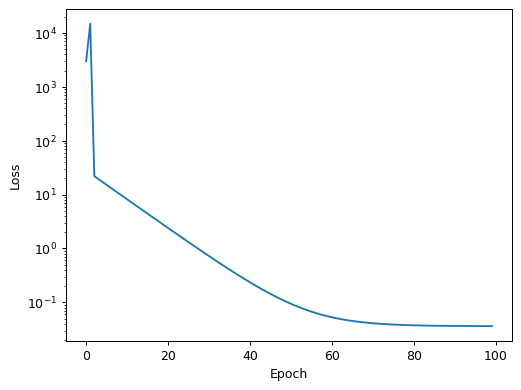

In [ ]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.yscale("log")
plt.show()

In [ ]:
print(torch.std(y-yhat)) #(error, dtype)

tensor(nan, dtype=torch.float64)


Text(0, 0.5, 'Residual (Error)')

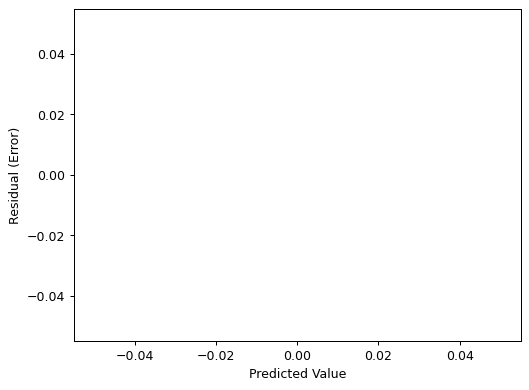

In [ ]:
plt.scatter(yhat, y-yhat)
plt.xlabel("Predicted Value")
plt.ylabel("Residual (Error)")


In [ ]:
#Equation Logic


a = torch.tensor([1,2,4]) #We can multiply tensors
b = torch.tensor([0,1,3])

In [ ]:
a*b + 4 #And add something to each value

tensor([ 4,  6, 16])

In [ ]:
#We can do the same thing with yhat since these are tensors

yhat = b + (w*x).sum(dim = 1) #Allows us to add down an entire column instead of all the columns (dim = 0 would add across rows)
print(yhat)

print(yhat.size()) #Y hat is now 1338 rows by 1 column (the charge column)

RuntimeError: The size of tensor a (3) must match the size of tensor b (1338) at non-singleton dimension 0

In [ ]:
#Now we're adding a non-linear layer to the data

# w linearly was 11 entires long, a single vector [1,0,2,...] <---- 1x11

#w neural network would be 1xRx11 (R is the number of Nodes)

#[1,2,0,...]
#[0,4,5,9,...]
#[1,3,4,0,...]
#...



#b linear is a single number, for a neural network there will be R many bs

#[54]
#[12]
#...

